In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# For models
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 146
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 14
[LightGBM] [Info] Start training from score 36.049615


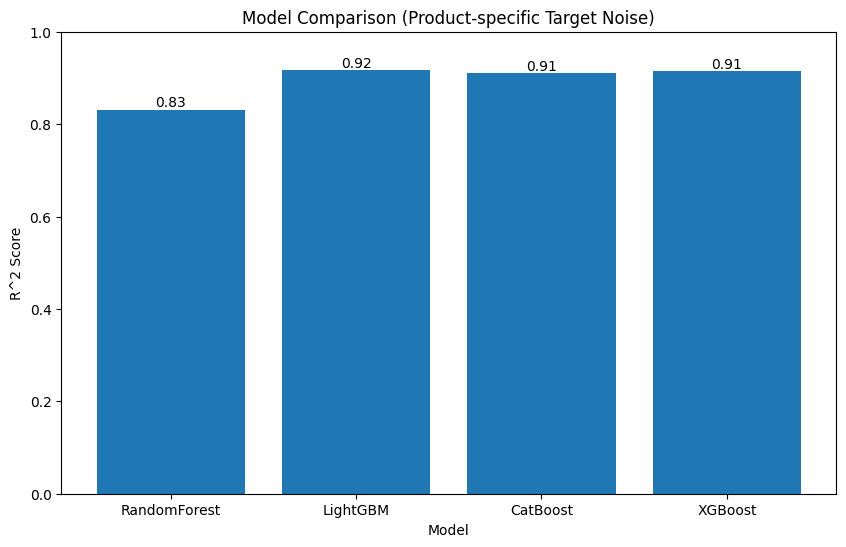

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

# Load your data
df = pd.read_csv('processed.csv')

# Product-specific noise ranges
noise_ranges = {
    "Air Conditioner": (700, 900),
    "Biographies": (1, 5),
    "Blender": (60, 100),
    "Boots": (15, 25),
    "Camera": (60, 100),
    "Comics": (1, 3),
    "Cookbooks": (1, 3),
    "Dishwasher": (500, 700),
    "Dress": (10, 20),
    "Fiction": (1, 5),
    "Flats": (10, 20),
    "Formal Shoes": (10, 20),
    "Gaming Console": (150, 250),
    "Graphic Novels": (1, 3),
    "Headphones": (50, 90),
    "Heels": (10, 20),
    "Hiking Shoes": (15, 25),
    "Jacket": (15, 25),
    "Jeans": (15, 25),
    "Laptop": (200, 300),
    "Magazines": (1, 3),
    "Microwave": (150, 250),
    "Monitor": (200, 300),
    "Non-Fiction": (1, 5),
    "Refrigerator": (600, 800),
    "Running Shoes": (10, 20),
    "Sandals": (5, 15),
    "Shirt": (10, 20),
    "Shorts": (10, 20),
    "Skirt": (10, 20),
    "Slippers": (5, 15),
    "Smartphone": (55, 85),
    "Smartwatch": (55, 85),
    "Sneakers": (10, 20),
    "Socks": (5, 10),
    "Speaker": (100, 150),
    "Sweater": (10, 20),
    "T-shirt": (5, 15),
    "Tablet": (150, 250),
    "Textbooks": (2, 5),
    "Toaster": (60, 100),
    "Vacuum Cleaner": (150, 250),
    "Washing Machine": (500, 700)
}

np.random.seed(42)

# Add small noise based on product name
def add_small_noise(row):
    min_noise, max_noise = noise_ranges.get(row['Product Name'], (0, 0))
    noise = np.random.uniform(min_noise * 0.1, max_noise * 0.1)  # 10% of range
    sign = np.random.choice([-1, 1])
    return row['Total Emissions'] + sign * noise

df['Noisy Emissions'] = df.apply(add_small_noise, axis=1)

# Prepare features and target
feature_cols = [col for col in df.columns if col.startswith('mass_') or col.startswith('ef_')]
X = df[feature_cols].fillna(0)
y = df['Noisy Emissions']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define regression models
models = {
    'RandomForest': RandomForestRegressor(n_estimators=1, max_depth=1, random_state=42),
    'LightGBM': lgb.LGBMRegressor(num_leaves=5, n_estimators=5, max_depth=4, learning_rate=0.3, random_state=42),
    'CatBoost': cb.CatBoostRegressor(iterations=5, depth=2, learning_rate=0.3, verbose=0, random_seed=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=5, max_depth=2, learning_rate=0.3, objective='reg:squarederror', random_state=42),
    
}

# Train, predict, and score
scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[name] = r2_score(y_test, y_pred)

# Plot R^2 accuracy
plt.figure(figsize=(10, 6))
bars = plt.bar(scores.keys(), scores.values())
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.title('Model Comparison (Product-specific Target Noise)')
plt.ylim(0, 1)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)
plt.show()


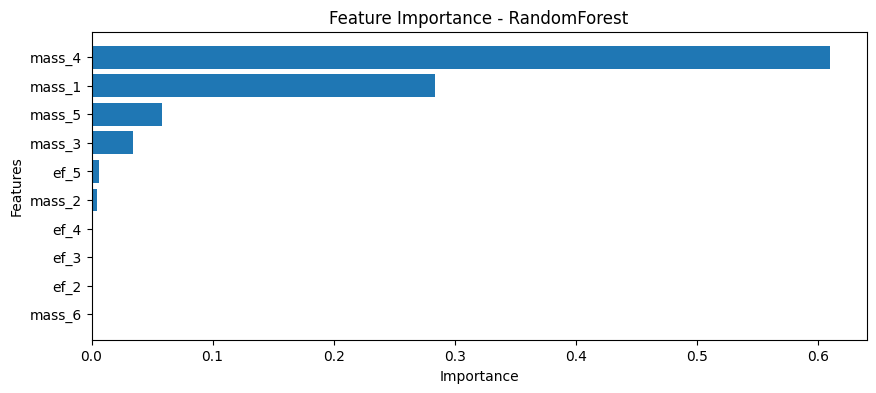

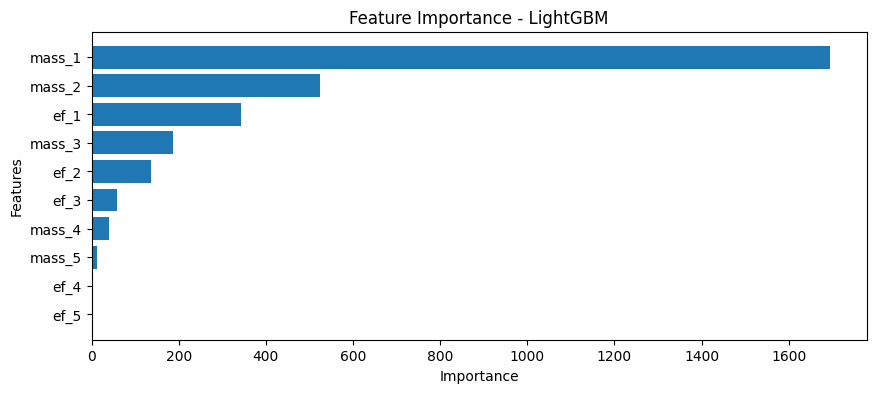

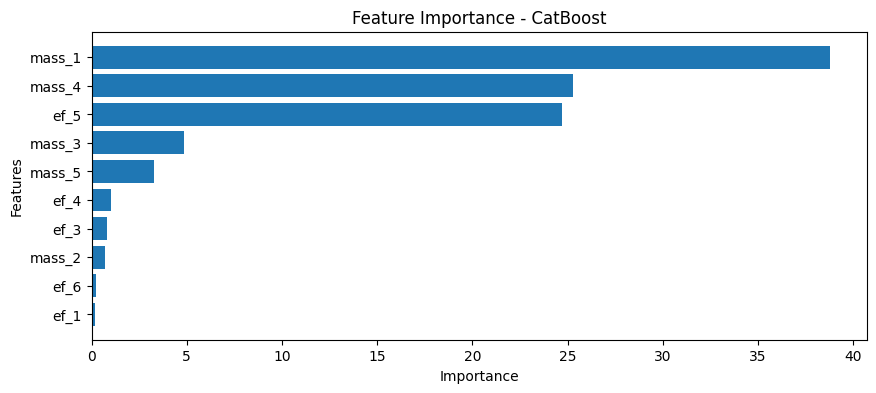

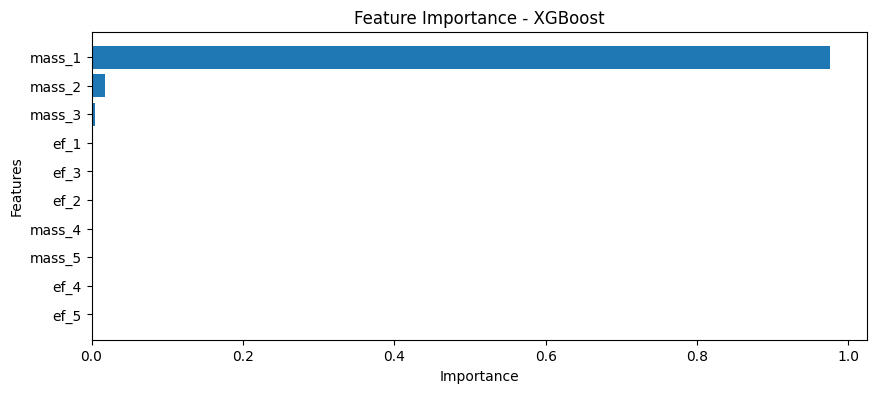

In [18]:
for name in models.keys():
    importance = importances[name]
    plt.figure(figsize=(10, 4))
    indices = np.argsort(importance)[-10:]  # Top 10 features
    plt.barh(np.array(feature_cols)[indices], importance[indices])
    plt.title(f'Feature Importance - {name}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()
